# Stylized Model Output

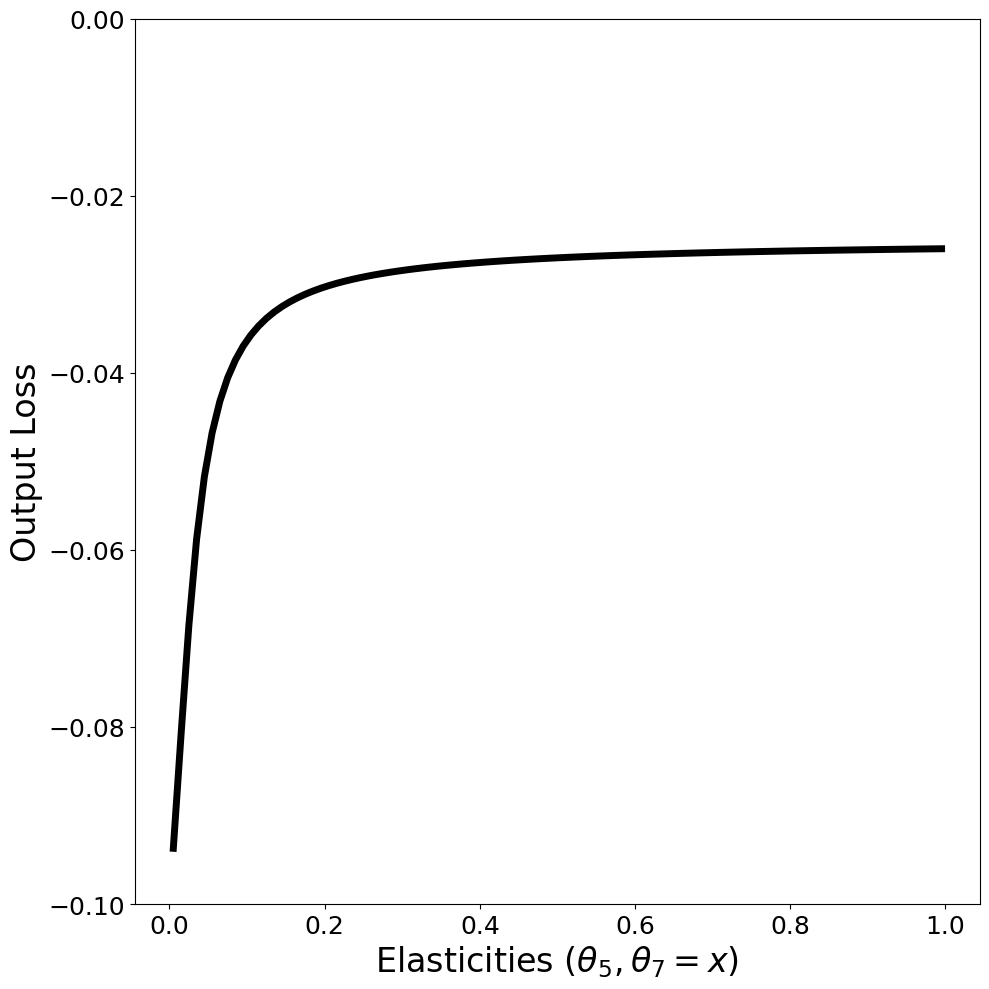

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def labor_from_omegas(omegas, L_tot=1.0):
    omega5, omega6, omega7 = omegas
    L1 = L_tot * omega7 * omega5
    L2 = L_tot * omega7 * (1 - omega5)
    L3 = L_tot * (1 - omega7) * omega6
    L4 = L_tot * (1 - omega7) * (1 - omega6)
    return np.array([L1, L2, L3, L4], dtype=float)

def ces(a, b, omega, theta):
    return ((omega)**(1/theta) * a**((theta - 1)/theta) +
            (1-omega)**(1/theta) * b**((theta - 1)/theta))**(theta/(theta - 1))

def y_stylized_omegaLabor(Zs, omegas, thetas=None, CD=False, return_details=False):
    z1, z2, z3, z4 = Zs
    omega5, omega6, omega7 = omegas

    # labor pinned by omegas; DOES NOT move with z-shocks
    L1, L2, L3, L4 = labor_from_omegas(omegas, L_tot=1.0)

    # primitives (linear in labor)
    x1 = z1 * L1
    x2 = z2 * L2
    x3 = z3 * L3
    x4 = z4 * L4

    # two-level aggregation
    if CD:
        y5 = x1**omega5 * x2**(1 - omega5)
        y6 = x3**omega6 * x4**(1 - omega6)
        y7 = y5**omega7 * y6**(1 - omega7)
    else:
        theta5, theta6, theta7 = thetas
        y5 = ces(x1, x2, omega5, theta5)
        y6 = ces(x3, x4, omega6, theta6)
        y7 = ces(y5, y6, omega7, theta7)

    if return_details:
        return y7, {"L": (L1, L2, L3, L4), "x": (x1, x2, x3, x4)}
    return y7

# Vary elasticities (omegas fixed)
theta5_list = np.linspace(5e-3, 1 - 5e-3, 100)
output_list_theta = []
for theta in theta5_list:
    omegas = (0.5, 0.5, 0.5)
    theta5 = theta
    theta7 = theta5
    theta6 = 3 - theta5 - theta7
    thetas = (theta5, theta6, theta7)
    y_noshock = y_stylized_omegaLabor((1, 1, 1, 1), omegas, thetas, CD=False)
    y_shock  = y_stylized_omegaLabor((.9, 1, 1, 1), omegas, thetas, CD=False)
    output_list_theta.append((y_shock - y_noshock) / y_noshock)

# Create simple 10x10 plot
plt.figure(figsize=(10, 10))
plt.plot(theta5_list, output_list_theta, color='black', linewidth=5)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Elasticities ($\\theta_5, \\theta_7 = x$)', fontsize=24)
plt.ylim(-0.1, 0)
plt.ylabel('Output Loss', fontsize=24)
plt.tight_layout()
plt.savefig('../figures/stylized_model_output.pdf')

# Binary Tree Diagram

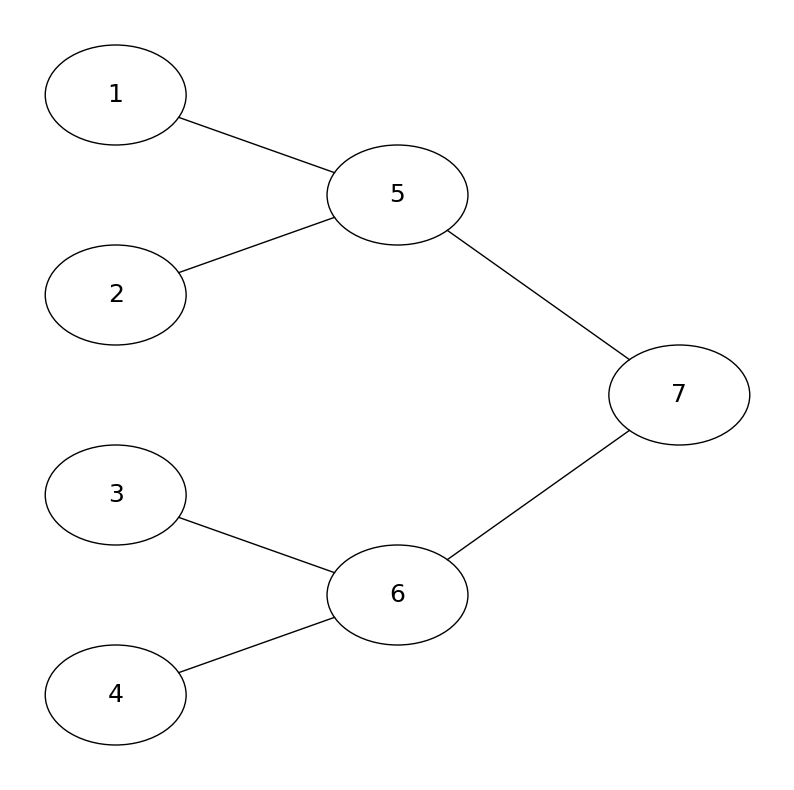

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define node positions for a binary tree rotated 90 degrees (7 on far right)
nodes = {
    7: (2, 0),          # Root (far right)
    5: (1, 1), 6: (1, -1),  # Depth 1
    1: (0, 1.5), 2: (0, 0.5), 3: (0, -0.5), 4: (0, -1.5)  # Depth 2 (leaves)
}

# Define edges for the binary tree
edges = [
    (7, 5), (7, 6),  # Root to Depth 1
    (5, 1), (5, 2), (6, 3), (6, 4)  # Depth 1 to Depth 2
]

# Function to calculate edge endpoints on circle boundaries
def calculate_edge(x1, y1, x2, y2, radius=0.25):
    dx, dy = x2 - x1, y2 - y1
    dist = np.sqrt(dx**2 + dy**2)
    x1_new = x1 + radius * dx / dist
    y1_new = y1 + radius * dy / dist
    x2_new = x2 - radius * dx / dist
    y2_new = y2 - radius * dy / dist
    return x1_new, y1_new, x2_new, y2_new

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# Draw edges
for start, end in edges:
    x1, y1 = nodes[start]
    x2, y2 = nodes[end]
    x1_new, y1_new, x2_new, y2_new = calculate_edge(x1, y1, x2, y2)
    ax.plot([x1_new, x2_new], [y1_new, y2_new], 'k-', linewidth=1)

# Draw nodes
for label, (x, y) in nodes.items():
    circle = plt.Circle((x, y), 0.25, fill=True, edgecolor='black', facecolor='white')
    ax.add_patch(circle)
    ax.text(x, y, str(label), ha='center', va='center', fontsize=18)

# Save plot
plt.savefig('../figures/binarytree_diag.pdf', bbox_inches='tight', dpi=300)

# Supply/Demand Intuition

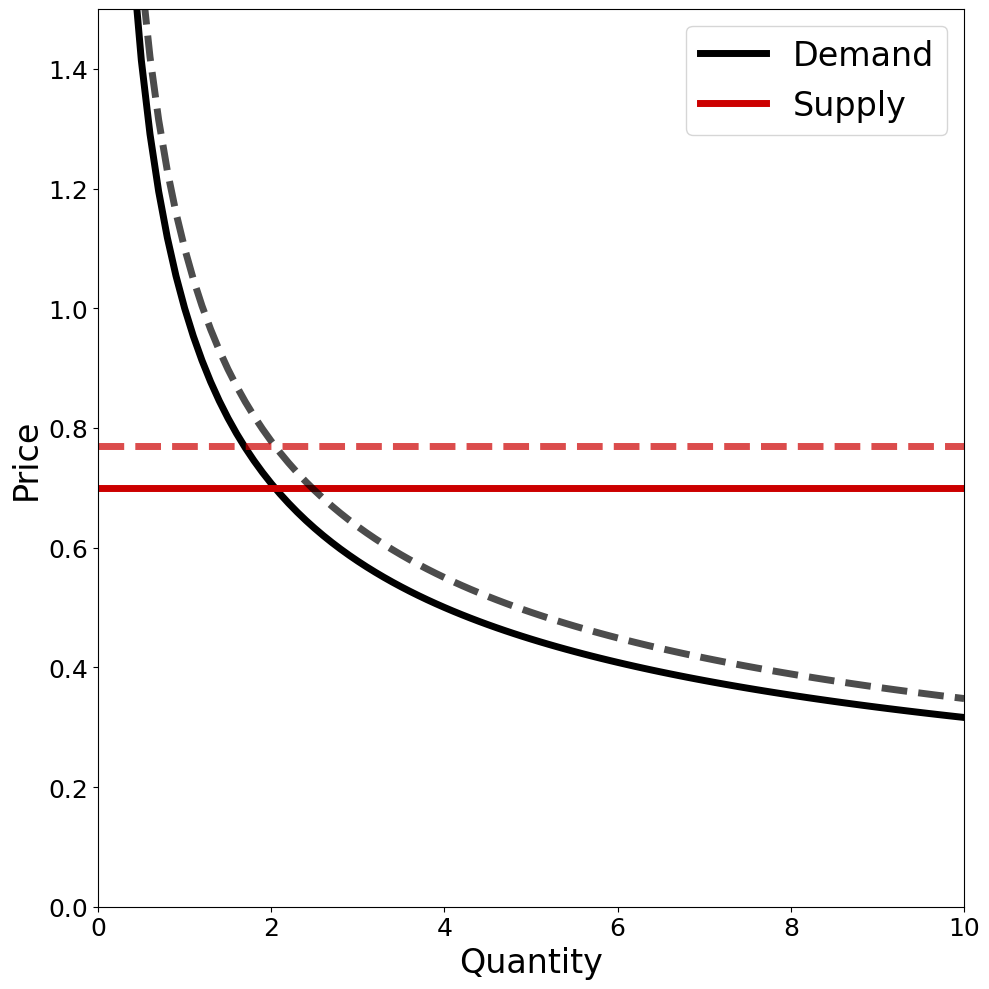

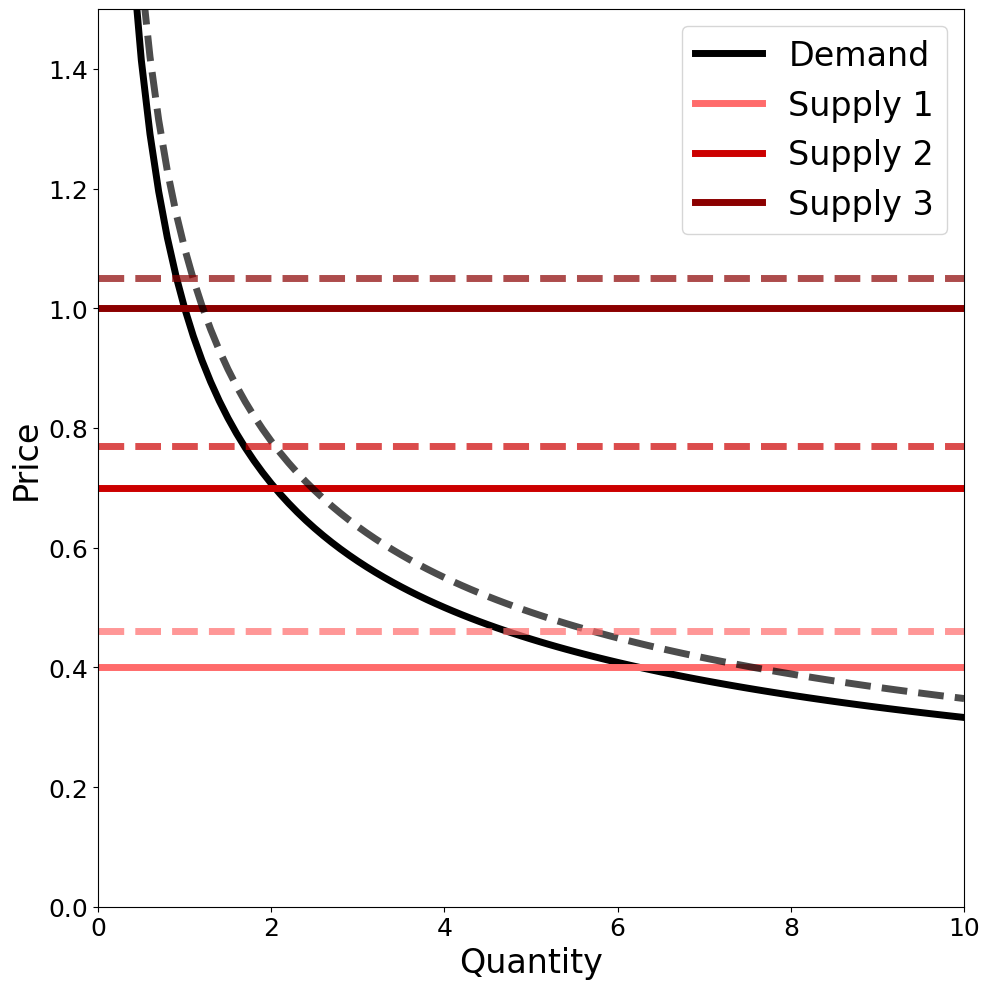

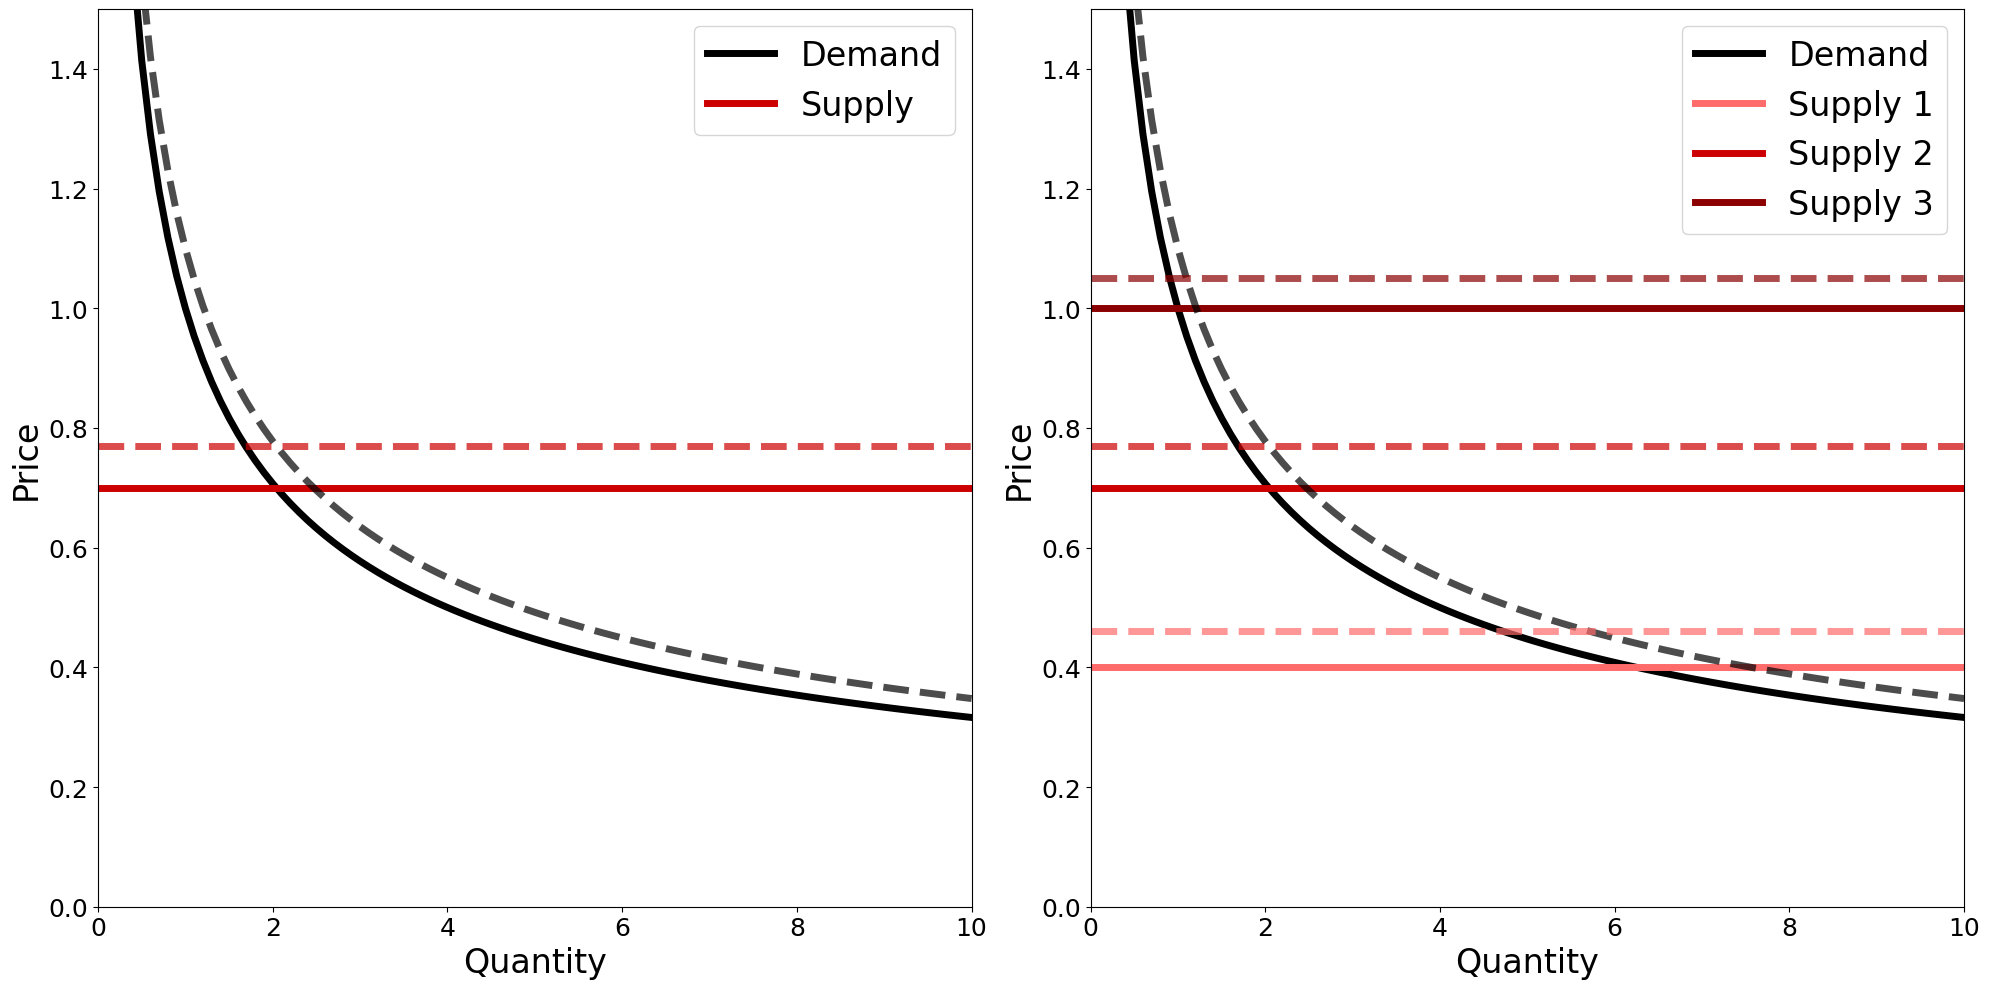

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the quantity range
q = np.linspace(0.1, 10, 100)

# Demand curve with elasticity -2
A_demand = 1
p_demand = A_demand * q**(-1/2)

# Three horizontal supply curves (perfectly elastic) at different price levels
supply_prices = [0.4, 0.7, 1.0]
colors_red = ['#FF6B6B', '#CC0000', '#8B0000']

# Epsilon for the shift
epsilon = 0.1
supply_shifts = [1.5 * epsilon, 1.0 * epsilon, .5 * epsilon]

def plot_single_shift(ax):
    """Plot figure 1: single shift"""
    ax.plot(q, p_demand, 'k-', linewidth=5, label='Demand')
    ax.axhline(y=supply_prices[1], color=colors_red[1], linewidth=5, label='Supply')   
    ax.plot(q, p_demand * (1 + epsilon), 'k--', linewidth=5, alpha=0.7)
    ax.axhline(y=supply_prices[1] * (1 + epsilon), color=colors_red[1], linestyle='--', linewidth=5, alpha=0.7)
    ax.set_xlabel('Quantity', fontsize=24)
    ax.set_ylabel('Price', fontsize=24)
    ax.legend(loc='best', fontsize=24)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 1.5)
    ax.tick_params(axis='both', which='major', labelsize=18)

def plot_multiple_shifts(ax):
    """Plot figure 2: multiple shifts"""
    ax.plot(q, p_demand, 'k-', linewidth=5, label='Demand')
    for i, (price, color) in enumerate(zip(supply_prices, colors_red)):
        ax.axhline(y=price, color=color, linewidth=5, label=f'Supply {i+1}')
    ax.plot(q, p_demand * (1 + epsilon), 'k--', linewidth=5, alpha=0.7)
    for i, (price, color, shift) in enumerate(zip(supply_prices, colors_red, supply_shifts)):
        ax.axhline(y=price * (1 + shift), color=color, linestyle='--', linewidth=5, alpha=0.7)
    ax.set_xlabel('Quantity', fontsize=24)
    ax.set_ylabel('Price', fontsize=24)
    ax.legend(loc='upper right', fontsize=24)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 1.5)
    ax.tick_params(axis='both', which='major', labelsize=18)

# Figure 1: Single shift
fig1, ax1 = plt.subplots(figsize=(10, 10))
plot_single_shift(ax1)
plt.tight_layout()
plt.savefig('../figures/supply_demand_single_shift.pdf', bbox_inches='tight', dpi=300)

# Figure 2: Multiple shifts
fig2, ax2 = plt.subplots(figsize=(10, 10))
plot_multiple_shifts(ax2)
plt.tight_layout()
plt.savefig('../figures/supply_demand_shifts.pdf', bbox_inches='tight', dpi=300)

# Figure 3: Side by side
fig3, (ax3a, ax3b) = plt.subplots(1, 2, figsize=(20, 10))
plot_single_shift(ax3a)
plot_multiple_shifts(ax3b)
plt.tight_layout()
plt.savefig('../figures/supply_demand_combined.pdf', bbox_inches='tight', dpi=300)
plt.show()